<a href="https://colab.research.google.com/github/lucianodevmobile123/MobileDev/blob/main/Identificacao_de_texto_com_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving detect_language_dataset.csv to detect_language_dataset.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd
import io

# Carrega o primeiro arquivo CSV enviado
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Visualiza os primeiros dados
df.head()


,text,lang
0,"Hello, how are you?",en
1,Good morning!,en
2,I love programming.,en
3,"Olá, como vai você?",pt
4,Bom dia!,pt


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Colunas
texts = df['text'].astype(str)
labels = df['lang'].astype(str)

# Vetorização com n-gramas de caracteres (ótimo para idiomas)
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))
x = vectorizer.fit_transform(texts).toarray()
y = labels.values

# Divisão em treino e teste
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=42)

print("Dados vetorizados e conjuntos separados!")


Dados vetorizados e conjuntos separados!


In [4]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(train_x, train_y)

print("Modelo treinado com sucesso!")


Modelo treinado com sucesso!


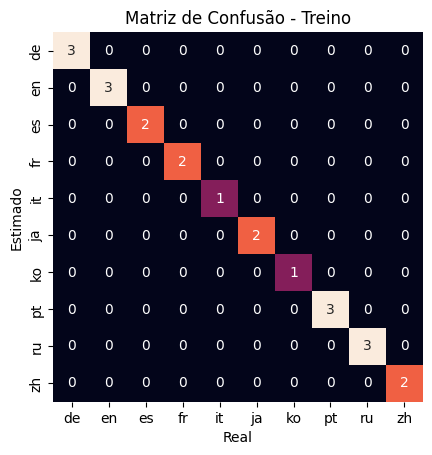

Relatório (Treino):
               precision    recall  f1-score   support

          de       1.00      1.00      1.00         3
          en       1.00      1.00      1.00         3
          es       1.00      1.00      1.00         2
          fr       1.00      1.00      1.00         2
          it       1.00      1.00      1.00         1
          ja       1.00      1.00      1.00         2
          ko       1.00      1.00      1.00         1
          pt       1.00      1.00      1.00         3
          ru       1.00      1.00      1.00         3
          zh       1.00      1.00      1.00         2

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

Acurácia (Treino): 1.0


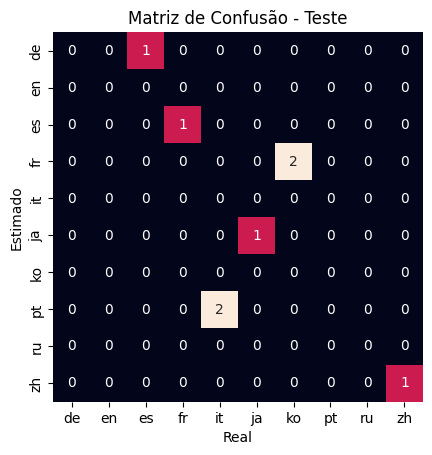

Relatório (Teste):
               precision    recall  f1-score   support

          de       0.00      0.00      0.00         0
          es       0.00      0.00      0.00         1
          fr       0.00      0.00      0.00         1
          it       0.00      0.00      0.00         2
          ja       1.00      1.00      1.00         1
          ko       0.00      0.00      0.00         2
          pt       0.00      0.00      0.00         0
          zh       1.00      1.00      1.00         1

    accuracy                           0.25         8
   macro avg       0.25      0.25      0.25         8
weighted avg       0.25      0.25      0.25         8

Acurácia (Teste): 0.25


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Avaliação no treino
train_pred = model.predict(train_x)
mat = confusion_matrix(train_y, train_pred, labels=model.classes_)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Matriz de Confusão - Treino")
plt.xlabel('Real')
plt.ylabel('Estimado')
plt.show()

print("Relatório (Treino):\n", classification_report(train_y, train_pred))
print("Acurácia (Treino):", accuracy_score(train_y, train_pred))

# Avaliação no teste
test_pred = model.predict(test_x)
mat = confusion_matrix(test_y, test_pred, labels=model.classes_)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Matriz de Confusão - Teste")
plt.xlabel('Real')
plt.ylabel('Estimado')
plt.show()

print("Relatório (Teste):\n", classification_report(test_y, test_pred))
print("Acurácia (Teste):", accuracy_score(test_y, test_pred))
